# Computer Vision - Assignment 2 - Convolutional Neural Networks for Image Classification

#### 10 (+3) points   |   Due date: November 25 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: <mark>Fernando Luque de la Torre</mark>

The goal of this assignment is to learn how to implement and use CNN models using the Fastai library. 

The goal of this assignmnet is to gain experience designing and training convolutional neural networks, using fast.ai. From a base network architecture that is provided, you have to learn to experiment with it and improve it by adding, modifying or deleting layers from this architecture in the task of classifying images into 25 categories. To carry out this assignment, a help guide is provided to know how:
1. Basic functions of reading data, training and optimization can be performed;
2. Graphs for the evolution of the classification error in
the training and validation sets can be created;
3. The classification error in the test set can be computed.

In [2]:
import sys
import subprocess
import pkg_resources

required = {'nbdev', 'fastbook'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed
print(missing)

if 'nbdev' in missing:
    print("INSTALLING nbdev")
    !pip install nbdev
!pip list |grep nbdev    
if 'fastbook' in missing:
    print("INSTALLING fastbook")
    !pip install -Uqq fastbook
!pip list |grep fastbook

{'fastbook', 'nbdev'}
INSTALLING nbdev
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 554 kB/s 
     |████████████████████████████████| 58 kB 2.6 MB/s 
     |████████████████████████████████| 78 kB 2.3 MB/s 
     |████████████████████████████████| 1.6 MB 47.5 MB/s 
nbdev                         2.3.9
INSTALLING fastbook
     |████████████████████████████████| 719 kB 7.6 MB/s 
     |████████████████████████████████| 451 kB 49.4 MB/s 
     |████████████████████████████████| 1.3 MB 45.7 MB/s 
     |████████████████████████████████| 5.5 MB 51.2 MB/s 
     |████████████████████████████████| 115 kB 64.9 MB/s 
     |████████████████████████████████| 182 kB 64.6 MB/s 
     |████████████████████████████████| 212 kB 64.0 MB/s 
     |████████████████████████████████| 127 kB 68.4 MB/s 
     |████████████████████████████████| 7.6 MB 50.2 MB/s 
fastbook                      0.0.29


In [3]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

Mounted at /content/gdrive
fastcore version 1.5.27 installed
fastai version 2.7.10 installed


In [4]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# **Exercise 1:** BaseNet in CIFAR100 (4 points)

*Dataset:*
In this exercise, we will work with part of the CIFAR100 dataset. This dataset consists of 60K color images of 32x32x3 (RGB) depicting 100 different classes (600 images per class). There are 50K images for training and 10K for testing. For the development of the exercise we will only consider 25 classes (out of 100). Therefore, the training set has 12,500 images and the test set 2,500 images. 10% of the training set will be used for validation. 

**Model BaseNet:**
We start by creating a base model called *BaseNet* which, after its training and execution, will give us a classification error which will be used as reference or baseline for further improvements. In order to create it (and later improve it), we will use a sensible combination of the following layers:
- Convolutional layers (Conv2D, either normal or atrous), 
- Pooling layers (Local and Global MaxPooling2D and AveragePooling2D), 
- Dense layers (also called fully connected layers), 
- Non-linear activations, (e.g. ReLu, leaky ReLu, etc.), 
- Flattening (i.e. convert 2D features to 1D features),  
- Batch Normalization, 
- and Regularization (e.g. Dropout or weight decay).

Our BaseNet model consists of two convolutional layers (conv-relu) at different scales (MaxPooling2D), and one head composed of two linear layers (i.e. two dense layers). The precise architecture is defined in the table below:

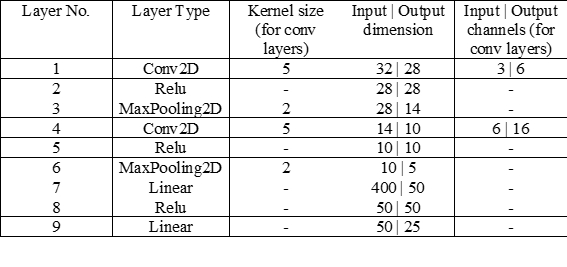

The students must:

1. Become familiar with the *BaseNet* architecture described above, the meaning of the different hyperparameters and the purpose of each layer. Create the code for the *BaseNet* model employing the fastai library, and using any of the techniques shown in the help guide.
2. Train the model and compute the values of “accuracy” and loss function for both training and test sets. Present the results using the provided functions.

In [ ]:
# We get the CIFAR100 dataset
path = untar_data(URLs.CIFAR_100,force_download=True)

In [ ]:
# The CIFAR_100 dataset, as well as the MNIST dataset, follows a common layout for machine learning datasets: 
# separate folders for the training set and the validation set (and/or test set). 
# Let's see what's inside both the training and test sets
print(path)
print(path.ls())
print((path/'train').ls())
print((path/'test').ls())
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))

/root/.fastai/data/cifar100
[Path('/root/.fastai/data/cifar100/train'), Path('/root/.fastai/data/cifar100/test')]
[Path('/root/.fastai/data/cifar100/train/people'), Path('/root/.fastai/data/cifar100/train/large_carnivores'), Path('/root/.fastai/data/cifar100/train/fish'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things'), Path('/root/.fastai/data/cifar100/train/small_mammals'), Path('/root/.fastai/data/cifar100/train/reptiles'), Path('/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores'), Path('/root/.fastai/data/cifar100/train/flowers'), Path('/root/.fastai/data/cifar100/train/vehicles_2'), Path('/root/.fastai/data/cifar100/train/non-insect_invertebrates'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals'), Path('/root/.fastai/data/cifar100/train/trees'), Path('/root/.fastai/data/cifar100/train/vehicles_1'), Path('/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes'), Path('

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. **The 100 classes in the CIFAR-100 are grouped into 20 superclasses**. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  50000
Total test images:  10000


We now keep the first 25 classes. To do so, we remove the last 75 from the dataset.

In [ ]:
#https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder
import shutil
number_of_classes_to_keep = 25
number_of_superclasses_to_keep = int(number_of_classes_to_keep/5)
print('SUPERCLASSES DELETED:')
for i in range(number_of_superclasses_to_keep,len(train_classes)):
  print(train_classes[i])
  shutil.rmtree(train_classes[i]) 
print('SUPERCLASSES KEPT:')
for i in range(number_of_superclasses_to_keep):
  print(train_classes[i])

SUPERCLASSES DELETED:
/root/.fastai/data/cifar100/train/small_mammals
/root/.fastai/data/cifar100/train/reptiles
/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/train/flowers
/root/.fastai/data/cifar100/train/vehicles_2
/root/.fastai/data/cifar100/train/non-insect_invertebrates
/root/.fastai/data/cifar100/train/aquatic_mammals
/root/.fastai/data/cifar100/train/trees
/root/.fastai/data/cifar100/train/vehicles_1
/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/train/household_furniture
/root/.fastai/data/cifar100/train/fruit_and_vegetables
/root/.fastai/data/cifar100/train/insects
/root/.fastai/data/cifar100/train/food_containers
/root/.fastai/data/cifar100/train/household_electrical_devices
SUPERCLASSES KEPT:
/root/.fastai/data/cifar100/train/people
/root/.fastai/data/cifar100/train/large_carnivores
/root/.fastai/data/cifar100/train/fish
/root/.fastai/data/cifar100/train/medium_mammals
/root/.fastai/d

In [ ]:
# We also remove the same superclasses from the test set
for i in range(number_of_superclasses_to_keep,len(test_classes)):
  print(test_classes[i])
  shutil.rmtree(test_classes[i]) 

/root/.fastai/data/cifar100/test/small_mammals
/root/.fastai/data/cifar100/test/reptiles
/root/.fastai/data/cifar100/test/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/test/flowers
/root/.fastai/data/cifar100/test/vehicles_2
/root/.fastai/data/cifar100/test/non-insect_invertebrates
/root/.fastai/data/cifar100/test/aquatic_mammals
/root/.fastai/data/cifar100/test/trees
/root/.fastai/data/cifar100/test/vehicles_1
/root/.fastai/data/cifar100/test/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/test/household_furniture
/root/.fastai/data/cifar100/test/fruit_and_vegetables
/root/.fastai/data/cifar100/test/insects
/root/.fastai/data/cifar100/test/food_containers
/root/.fastai/data/cifar100/test/household_electrical_devices


Now we verify if we have removed them correctly. 

In [ ]:
print(path)
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))
print(len(test_classes))

/root/.fastai/data/cifar100
5
5


And that the number of examples is correct

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  12500
Total test images:  2500


Now we should have 12500 images for training and 2500 images for testing. 

Next, we should employ DataLoaders and DataBlock to load the data. 

## Creación de DataBlock y DataLoader
Una vez tenemos la ruta a las imágenes, procederemos a crear en primer lugar el datablock que se encargará de darles estructura.<br/>
Para ello:
* blocks: Define que cada uno de los archivos constará de una imagen y una etiqueta (Category)
* get_items: La forma de leer los archivos, en este caso, todas las imágenes en el path que le indiquemos
* get_y: La manera de obtener la clase de cada objeto, en nuestro caso el nombre de la carpeta en la que se encuentra
* splitter: La manera de dividir entre training y validación (en este caso aleatoria con el porcentaje del 20% que por defecto utiliza el Splitter). Establecemos una semilla para que la división en apartados posteriores sea la misma que en este apartado

Una vez creado el datablock, obtenemos algo de información con la función summary y posteriormente creamos el correspondiente dataloader a partir de la ruta de entrenamiento. Por último, mostramos algunas imágenes.

Destacar que en este caso, estoy utilizando la división entre train y test establecida por el propio dataset y el conjunto de test será utilizado únicamente para la validación final del modelo (tras las mejoras) sirviéndonos de los valores de accuracy y loss en validación para las evaluaciones intermedias.

Para el valor de batch size utilizaremos un valor que se ha demostrado válido para la mayoría de los casos, que es de 64.

Setting-up type transforms pipelines
Found 12500 items
2 datasets of sizes 10000,2500
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/cifar100/train/vehicles_1/bicycle/safety_bike_s_001590.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/cifar100/train/vehicles_1/bicycle/safety_bike_s_001590.png
    applying parent_label gives
      bicycle
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(1))


Found 12500 items
2 datasets of sizes 10000,2500
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, '

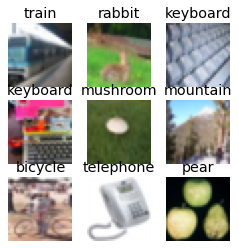

In [ ]:
#Code to be done by the students.
CIFAR100db = DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0) 
                  )             
                   
CIFAR100db.summary(path/'train')
CIFAR100dl=CIFAR100db.dataloaders(path/'train') 
CIFAR100dl.show_batch(max_n=9, figsize=(4,4)) # shows a batch of images

## Creación y entrenamiento del modelo BaseNet


### Creación
Ahora, una vez con los datos cargados, procedemos a crear el modelo propuesto, por medio de las siguientes capas:
* nn.Conv2d: Una capa convolucional básica, a la que le indicamos los canales de entrada y salida, el tamaño de la máscara y el padding. No se incluye activación por lo que debemos de introducirla como otra capa
* nn.ReLU: Una capa de activación
* nn.MaxPool2d: Capa que aplica maxpooling, en este caso utilizaremos stride 2 y kernel_size 2. El tamaño de la imagen se reducirá a la mitad
* Flatten(): Capa de fastai que nos permite llevar el resultado de las convoluciones y maxpooling a un vector 1D para introducirlo en las capas Lineares
* nn.Linear(): Capas densas que constituyen (junto con una ReLU) la cabeza (clasificador) de nuestro modelo. Es importante que la última capa Linear tenga tantos canales de salida como clases queremos clasificarB

In [ ]:
class BaseNet(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5), padding='valid'),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,stride=2),
      nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), padding='valid'),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,stride=2),
      Flatten(),
      nn.Linear(400, 50),
      nn.ReLU(),
      nn.Linear(50, 25)
    )

### Procedimiento
Procedemos ahora al entrenamiento del modelo. Para ello:
1. Estableceremos el valor de learning rate maximo con la ayuda de la función lr_find
2. Ajustaremos nuestro modelo según los datos de entrenamiento por medio de la función fit_one_cycle, con un número de épocas prefijado en 5 (tras realizar varias pruebas he comprobado que no es necesario aumentar el número de épocas porque no conlleva a mejora, algo que se observará también posteriormente en el ejercicio 2 cuando analicemos el early stopping)
3. Mostramos diferentes informaciones del entrenamiento con las funciones plot_metrics, show_results y summary

---



### Función de pérdida
Como función de pérdida utilizaremos para el entrenamiento la función Focal Loss. Como breve explicación de esta función, diremos que se trata de una modificación de la entropía cruzada:

$CE(p_t)=-\log(p_t)$<br/>
$FL(p_t)=-(1-p_t)^γ\log(p_t)$

<img src="https://amaarora.github.io/images/FL_v_CE.png" width="500" alt="CE vs FL"/>

Como podemos ver en la imagen, para una probabilidad del 60% de acertar con la clase de la imagen, nos da un CE Loss de alrededor de 0.5, mientras que con FC Loss ese valor se reduce enormemente. Esto nos conviene dado que un error tan alto de pérdida puede provocar efectos negativos en el modelo, como que este se vea obligado a tener una confianza muy alta en sus ejemplos de entrenamiento y no generalice bien.

https://amaarora.github.io/2020/06/29/FocalLoss.html

Añadir también que se han realizado pruebas con Cross Entropy Loss y el resultado era muy similar (peor en algunos entrenamientos)

---


### Métricas de error
Otros puntos a destacar del Learner son:
* Las métricas que obtendremos:  
  * $accuracy = \frac{Total\ de\ predicciones\ correctas}{Total\ de\ predicciones}$
  * $error\_rate = 1-accuracy$

Aunque este pueda parecer un análisis algo escaso, después introduciremos la matriz de confusión que nos dará algo más de información.

---



### Algoritmo de optimización

Por otro lado, destacar también que la optimización utilizada por el Learner, será el optimizador Adam (valor por defecto). Como ligero marco teórico, el optimizador Adam combina las ventajas de otras dos extensiones del SGD (SGD con momento y RMSProp), combinando los gradientes al cuadrado (de RMSprop) y la media móvil del gradiente (SGD con momento) (https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

---


### Método de entrenamiento

Por otro lado, utilizamos la función fit_one_cycle. La política *1cycle*, establece el siguiente método para encontrar un learning inicial correcto que indicar al algoritmo Adam:
1. Establece un learning rate grande para entrenar con él. Este producirá un gran crecimento inicial de la accuracy.
2. Después de esto, la accuracy puede mantenerse o incluso disminuir a medida que el learning rate disminuye para "afinar" en su búsqueda del mínimo
3. Ya con valor de learning rate pequeño, la accuracy vuelve a crecer encontrando un mínimo en la función de pérdida.

<img src="https://iconof.com/static/36d3bd4cde3661e4f9bbde7c173c87ba/454e4/lr_vs_clr_resnet56.png" width="500" alt="1CyclePolicy"/>

Esta política *1cycle* forma parte de los métodos CLRs (Cyclical Learning Rates) propuestos por Leslie N. Smith en su estudio de la super-convergencia.

https://iconof.com/1cycle-learning-rate-policy/


0.0005754399462603033


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.965572,2.959327,0.040400,0.959600,00:12
1,2.670996,2.463233,0.172800,0.827200,00:12
2,2.306370,2.238252,0.218000,0.782000,00:12
3,2.154709,2.171166,0.240400,0.759600,00:12
4,2.077806,2.101865,0.266000,0.734000,00:14
5,2.022355,2.050863,0.273200,0.726800,00:13
6,1.985000,2.027840,0.280800,0.719200,00:16
7,1.944459,1.993646,0.283600,0.716400,00:17
8,1.931620,1.984166,0.287200,0.712800,00:19
9,1.945102,1.974112,0.297600,0.702400,00:15


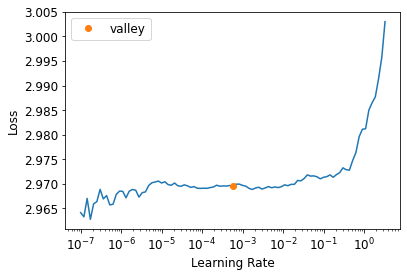

In [ ]:
learn = Learner(CIFAR100dl, BaseNet(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())
lr=learn.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])
# Recomendable estudiar el learning rate en dos valores más, uno por encima y otro por debajo del aportado por lr_find

learn.fit_one_cycle(n_epoch=10, lr_max=lr[0]) # running the optimizer one-cycle

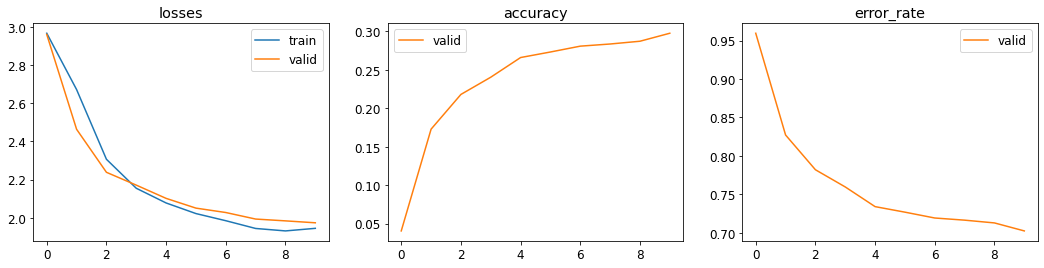

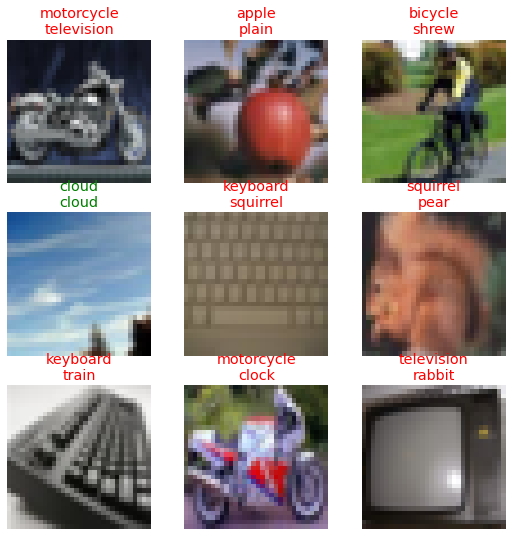

In [ ]:
learn.recorder.plot_metrics() # shows accuracy curve along epochs
learn.show_results()

In [ ]:
print("Accuracy BaseNet")
cm = ClassificationInterpretation.from_learner(learn, 1, CIFAR100dl.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learn, 1, CIFAR100dl.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy BaseNet


Accuracy Train:  30.520000000000003 %


Accuracy Valid:  29.759999999999998 %


Como podemos ver, nuestro modelo consigue entorno a un 30% de accuracy en validación (depende mucho de la ejecución). Para tratar de obtener más información vamos a mostrar la matriz de confusión en el conjunto de validación:

Number of validation examples: 2500


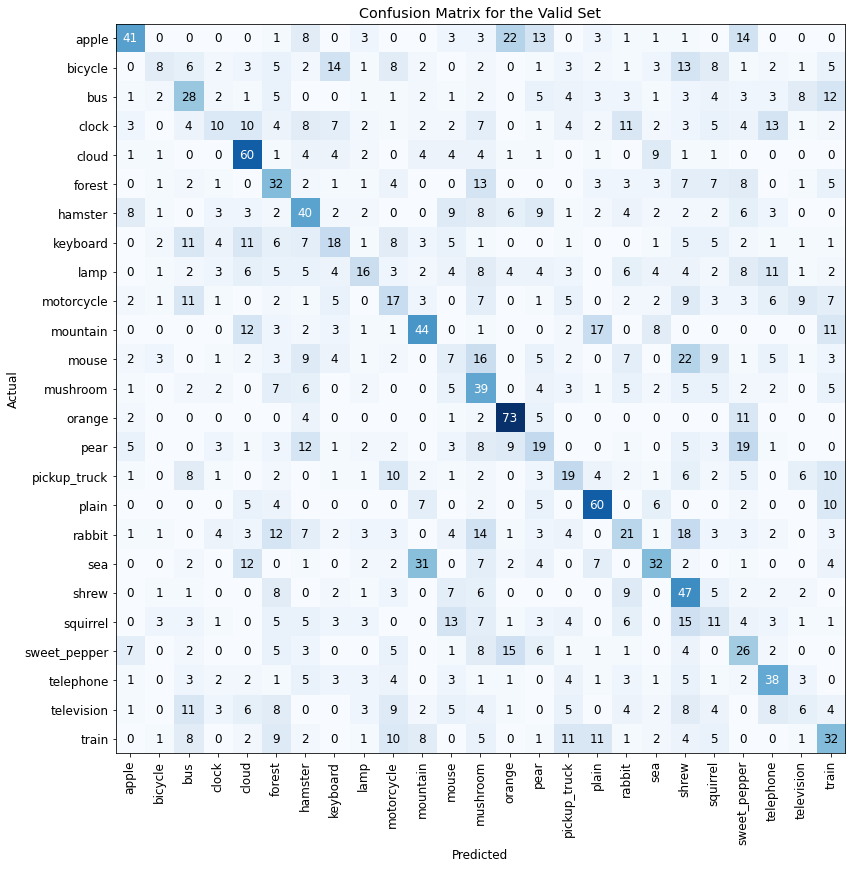

In [ ]:
# We compute the confusion matrix
interp = ClassificationInterpretation.from_learner(learn, 1, CIFAR100dl.valid)
cm = interp.confusion_matrix()
print('Number of validation examples:', np.sum(cm))
interp.plot_confusion_matrix(figsize=(12, 12),title='Confusion Matrix for the Valid Set')

Como podemos ver, la matriz de confusión en el conjunto de validación no es muy esperanzadora para este modelo ya que hay algunas clases que apenas son reconocidas.

Estto es un indicador de que el modelo es bastante limitado y por tanto, la tarea en el siguiente ejercicio se tratará de tomar una serie de decisiones que nos permitan mejorar el rendimiento de este modelo.



---



---



---



# **Exercise 2:** **Improvement of the BaseNet model (3 points)**
Now the goal is to create, by making judicious architectural and implementation choices, an enhanced deep network based on *BaseNet*. A good combination of layers can make the accuracy of the new model close to 50% on our CIFAR100 data. To enhance your network, you may consider adding any combination of the following enhancement options:
1. **Data normalization**. Scale normalization of the input data, in general, makes training easier and more robust. Use the DataLoader or ImageDataLoaders class with the correct parameters so that the data is well conditioned (mean=0, stddev=1) to improve training. You must ensure that test_transform uses the same normalization parameters as train_transform.
2. **Batch normalization**. Batch-normalization layers in most cases help to reduce overfitting and improve model training. Add normalization layers after convolutional layers and before the ReLU layer, but try including it after ReLU layers as well.
3. **Depth increase**. Experiment adding convolutional layers. Do not always put a maxpool layer after each conv layer, as this leads to excessive loss of information by reducing the number of units. If needed use UpSampling (Transposed Convolution) layers to increase the number of units.
4. **Dropout**. This layer introduces regularization by randomly selecting a percentage of active neurons for each mini-batch. This helps the network to specialize neurons in specific and independent information.
5. **Early Stopping**. After how many epochs we should stop training? This answer on stack-exchange (https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set/18346#18346) is a good summary of using train-val-test splits to reduce overfitting. This blog (https://elitedatascience.com/overfitting-in-machine-learning#how-to-prevent) is also a good reference for “early stopping”. Very important: keep in mind that you should never use the test set for anything other than the final evaluation. You should decide for how many epochs you will train your model by looking at the training loss and validation accuracy plots (to do so, evaluate the local minima/maxima of the loss function as well as the classification accuracy). Remember that if you choose too many epochs it would quite likely lead to overfitting, while if you select too few your model quite likely won't  learn enough. In your report, you must include a table similar to the one shown in Exercise 1 to illustrate the architecture of your final improved network. In addition, you must explain the steps taken with the partial results obtained that have finally led you to introduce the proposed modifications.
6. **Data augmentation**.  Use the DataLoader or ImageDataLoaders class data zoom parameters, like zoom_range and/or horizontal_flip. Remember that you should not have any data augmentation in the validation or test sets. If you need a better understanding, try reading Fastai's tutorial on transformations. Look at data augmentation using image transformations.

---



---



---

En mi caso, tras varios experimentos, he ido añadiendo mejoras en un orden que he considerado lógico y conveniente, ya que por ejemplo, no tendría sentido que estudiara la introducción de Dropout o Early Stopping antes de aumentar la profundidad del modelo, ya que no era hasta entonces cuando obtenía problemas de overfitting.

## Data normalization
En primer lugar, procederemos a aplicar Data normalization a los datos para hacer el aprendizaje más rápido. Para ello, nos bastará simplemente con introducir en el parámetro batch_tfms del DataBlock la llamada a la función Normalize de fastai que se encargará de normalizar las imágenes de entrada.

Nuestro modelo BaseNet no se verá influenciado para nada por lo que podemos seguir utilizando el mismo

In [ ]:
CIFAR100dbNormalized = DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()] # Normalize data
                  )             

CIFAR100dlNormalized=CIFAR100dbNormalized.dataloaders(path/'train') 
# CIFAR100dl.show_batch(max_n=9, figsize=(4,4)) # shows a batch of images

0.0006918309954926372


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.938270,2.905087,0.079600,0.920400,00:12
1,2.551717,2.400846,0.200800,0.799200,00:12
2,2.225732,2.193183,0.239600,0.760400,00:16
3,2.044647,2.024961,0.265200,0.734800,00:13
4,1.902520,1.889841,0.310400,0.689600,00:13
5,1.771799,1.808149,0.328400,0.671600,00:13
6,1.663568,1.689913,0.354800,0.645200,00:13
7,1.572907,1.682901,0.357600,0.642400,00:15
8,1.505590,1.598119,0.381200,0.618800,00:13
9,1.424209,1.564966,0.385200,0.614800,00:13


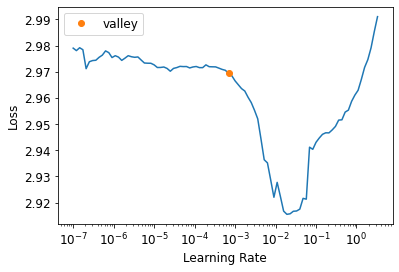

In [ ]:
learnNormalized = Learner(CIFAR100dlNormalized, BaseNet(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())
lr=learnNormalized.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnNormalized.fit_one_cycle(n_epoch=20, lr_max=lr[0]) # running the optimizer one-cycle

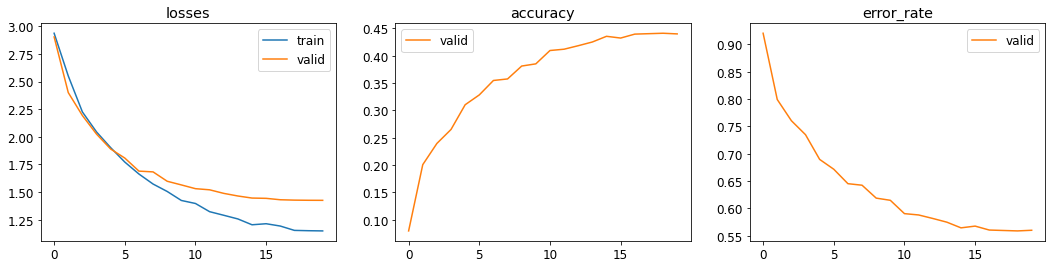

In [ ]:
learnNormalized.recorder.plot_metrics() # shows accuracy curve along epochs

Como podemos ver:

In [ ]:
print("Accuracy BaseNet con Data Normalization")
cm = ClassificationInterpretation.from_learner(learnNormalized, 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnNormalized, 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy BaseNet con Data Normalization


Accuracy Train:  52.470000000000006 %


Accuracy Valid:  44.0 %


Con la información obtenida de las gráficas y de los valores de accuracy en train y validación vemos que el modelo ha mejorado con respecto al modelo BaseNet bastante. Observamos también que el valor de accuracy en train se aleja del de validación, este es un tema que abordaremos más adelante.

Podemos echar también un vistazo a la matriz de confusión para el conjunto de validación. No tenemos que encargarnos de normalizar ya que la función from_learner de fastai realiza una llamada a get_preds, lo cual normaliza el conjunto de validación con los mismos valores con los que hemos normalizado el de entrenamiento

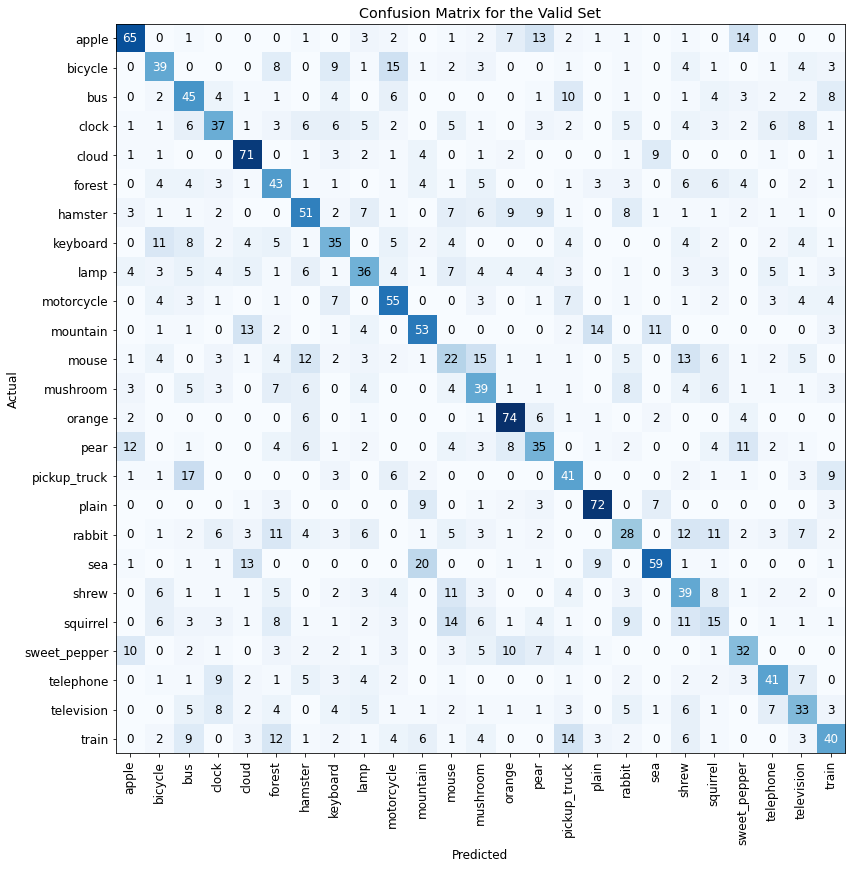

In [ ]:
interp = ClassificationInterpretation.from_learner(learnNormalized, 1, CIFAR100dlNormalized.valid)
cm = interp.confusion_matrix()
interp.plot_confusion_matrix(figsize=(12, 12),title='Confusion Matrix for the Valid Set')

Como podemos ver en la matriz de confusión, la mejora de la accuracy en validación nos da una mejora bastante notable en la matriz de confusión haciendo que la diagonal principal (predicciones correctas) se vea mucho más resaltada.



---



## Profundidad
La profundidad de una red neuronal viene dada por el número de capas que esta tenga. Por tanto, para aumentar la profundidad debemos aumentar el número de capas

Generalmente por capa convolucional se entiende la combinación de convolución+activación+pooling. Sin embargo en nuestro caso, dado que las imágenes son bastante pequeñas, añadiremos capas sin pooling porque si no, no podríamos añadir demasiadas.

Vamos a comparar el desempeño de dos modificaciones diferentes. La primera añadirá otras dos capas convolucionales con kernels 5x5 y mantendrá las dos capas de MaxPooling.

En la segunda, el número de capas será similar a la primera pero los kernels de convolución serán 3x3.

Aclarar que todas las capas convolucionales incluirán la función de activación.

Además de profundidad, las capas convolucionales van a proporcionar también anchura, pues el número de filtros en cada una de las capas (canales de salida) también va a ser incrementado en gran medida.

In [ ]:
class DeeperNet1(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(5,5), padding='valid'),
      nn.ReLU(),
      
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5), padding='same'),
      nn.ReLU(),

      nn.MaxPool2d(kernel_size=2,stride=2),

      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(5,5), padding='valid'),
      nn.ReLU(),
      
      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(5,5), padding='same'),
      nn.ReLU(),
      
      nn.MaxPool2d(kernel_size=2,stride=2),      
      Flatten(),

      nn.Linear(5*5*256, 500),
      nn.ReLU(),

      nn.Linear(500, 25)
    )

In [ ]:
class DeeperNet2(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),

      nn.MaxPool2d(kernel_size=2,stride=2),

      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.MaxPool2d(kernel_size=2,stride=2),      
      Flatten(),

      nn.Linear(5*5*256, 500),
      nn.ReLU(),

      nn.Linear(500, 25)
    )

In [ ]:
CIFAR100dlNormalized=DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()] # Normalize data
                  ).dataloaders(path/'train') 

# Usamos el mismo dataloader que antes (el que ya normaliza las imágnes)
learnDepth = [None,None]
learnDepth[0] = Learner(CIFAR100dlNormalized, DeeperNet1(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())
learnDepth[1] = Learner(CIFAR100dlNormalized, DeeperNet2(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())

0.00010964782268274575


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.833607,2.594538,0.154800,0.845200,00:13
1,2.255603,2.162912,0.210000,0.790000,00:15
2,2.018615,1.914122,0.306000,0.694000,00:13
3,1.779406,1.762512,0.332800,0.667200,00:13
4,1.584044,1.553237,0.393200,0.606800,00:13
5,1.418771,1.424563,0.428400,0.571600,00:13
6,1.251745,1.351889,0.449600,0.550400,00:15
7,1.166230,1.310100,0.456400,0.543600,00:13
8,1.059425,1.288733,0.464000,0.536000,00:13
9,0.966994,1.259345,0.481600,0.518400,00:13


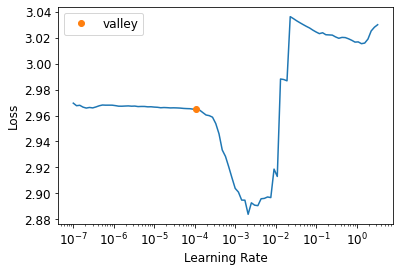

In [ ]:
lr=learnDepth[0].lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnDepth[0].fit_one_cycle(n_epoch=15, lr_max=lr[0]) # running the optimizer one-cycle

0.0003981071640737355


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.567922,2.315673,0.211200,0.788800,00:15
1,2.048800,1.962037,0.275200,0.724800,00:13
2,1.654755,1.616645,0.368400,0.631600,00:13
3,1.381163,1.399598,0.445600,0.554400,00:13
4,1.168442,1.251884,0.477200,0.522800,00:13
5,1.002640,1.218058,0.486800,0.513200,00:15
6,0.840850,1.127268,0.526800,0.473200,00:13
7,0.668136,1.126907,0.535200,0.464800,00:13
8,0.495921,1.236326,0.519600,0.480400,00:13
9,0.354187,1.175369,0.556400,0.443600,00:13


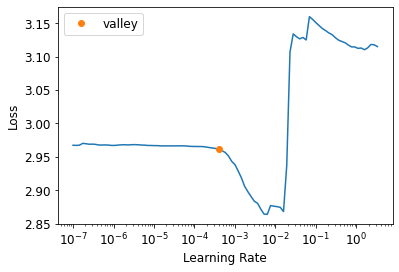

In [ ]:
lr=learnDepth[1].lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnDepth[1].fit_one_cycle(n_epoch=15, lr_max=lr[0]) # running the optimizer one-cycle

Métricas del modelo con máscaras 5x5


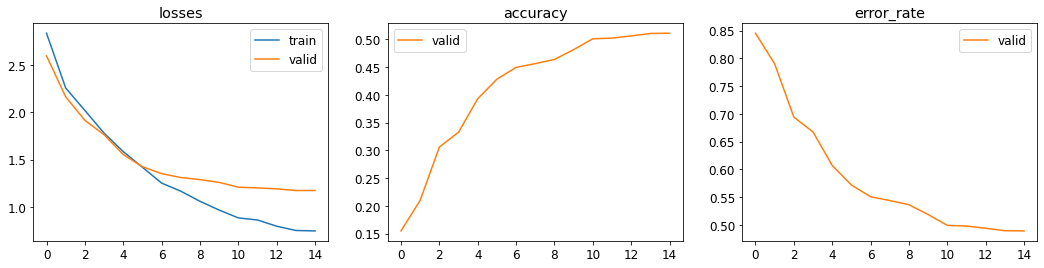

In [ ]:
print("Métricas del modelo con máscaras 5x5")
learnDepth[0].recorder.plot_metrics()

Métricas del modelo con máscaras 3x3


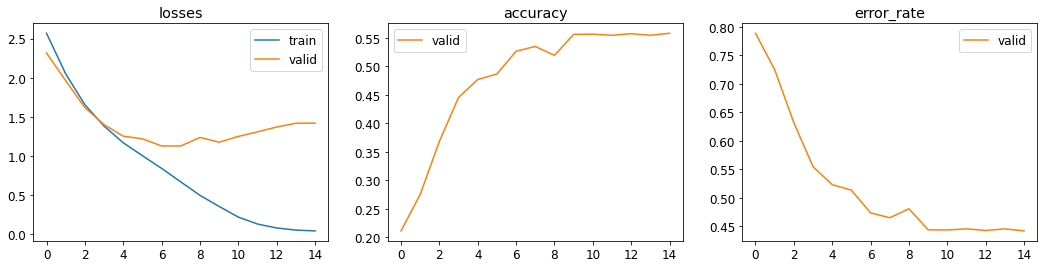

In [ ]:
print("Métricas del modelo con máscaras 3x3")
learnDepth[1].recorder.plot_metrics()

In [ ]:
print("Accuracy DeeperNet1")
cm = ClassificationInterpretation.from_learner(learnDepth[0], 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnDepth[0], 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy DeeperNet1


Accuracy Train:  65.94 %


Accuracy Valid:  51.12 %


In [ ]:
print("Accuracy DeeperNet2")
cm = ClassificationInterpretation.from_learner(learnDepth[1], 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnDepth[1], 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy DeeperNet2


Accuracy Train:  98.37 %


Accuracy Valid:  55.84 %


Como vemos, el aumento de la profundidad supone una mejora con respecto al modelo básico de la accuracy en validación, por lo que en nuestro modelo final, aumentaremos el número de capas de la forma en que lo hemos hecho aquí.

Además, diferenciar también el primer caso del segundo, donde la sustitución de las capas de convolución 5x5 por las capas 3x3, además de reducir el número de parámetros, nos consigue un mejor valor de accuracy en validación (tampoco es una mejora brutal con respecto a las máscaras 5x5, pero escogemos esta opción).

A pesar de que es cierto que el modelo con máscaras 3x3 en este entrenamiento nos produce un mayor overfitting, eso es algo que se tratará ahora y no debe influir en esta decisión.

## Dropout
Las capas de Dropout, como hemos visto en teoría, añaden una probabilidad de que las neuronas se desactiven durante el entrenamiento, con el objetivo de hacer que el resto de neuronas que aún quedan activas, se especialicen más y esto sirva como un método de regularización. En este caso, hemos visto en el apartado anterior que la regularización es muy necesaria pues obtenemos un clarísimo ejemplo de overfitting, pues la accuracy en el conjunto de train dista muchísimo de la del conjunto de validación, por lo que el Dropout será una buena opción.

En el paper original que propuso la utilización de capas de Dropout, se proponía utilizarlas en las capas densas, con una probabilidad de dropout de en torno al 50%.

Además, estudios más recientes también dan importancia a aplicar capas de dropout con probabilidades bajas en las capas convolucionales (0.1, 0.2).

En mi caso las introduciré en ambos sitios con las probabilidades recomendadas

https://stats.stackexchange.com/questions/240305/where-should-i-place-dropout-layers-in-a-neural-network



In [ ]:
class DropoutNet(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.Dropout(0.2),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),

      nn.MaxPool2d(kernel_size=2,stride=2),

      nn.Dropout(0.2),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.Dropout(0.2),
      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.MaxPool2d(kernel_size=2,stride=2),      
      Flatten(),

      nn.Linear(5*5*256, 500),
      nn.ReLU(),

      nn.Dropout(0.5),
      nn.Linear(500, 25)
    )

In [ ]:
CIFAR100dlNormalized=DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()] # Normalize data
                  ).dataloaders(path/'train') 

# Usamos el mismo dataloader que antes (el que ya normaliza las imágnes)
learnDropout = Learner(CIFAR100dlNormalized, DropoutNet(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())

0.0006918309954926372


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.669497,2.453216,0.165600,0.834400,00:15
1,2.207167,2.059667,0.287200,0.712800,00:20
2,1.839499,1.685216,0.362000,0.638000,00:17
3,1.609883,1.524664,0.411600,0.588400,00:17
4,1.401691,1.321782,0.460000,0.540000,00:16
5,1.222095,1.227563,0.491200,0.508800,00:22
6,1.064686,1.144055,0.515200,0.484800,00:16
7,0.910721,1.072460,0.540000,0.460000,00:13
8,0.760552,1.045732,0.539600,0.460400,00:13
9,0.628200,0.993140,0.557200,0.442800,00:15


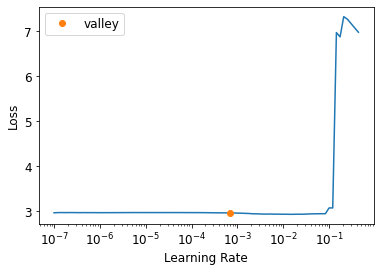

In [ ]:
lr=learnDropout.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnDropout.fit_one_cycle(n_epoch=15, lr_max=lr[0]) # running the optimizer one-cycle

Métricas del modelo con Dropout


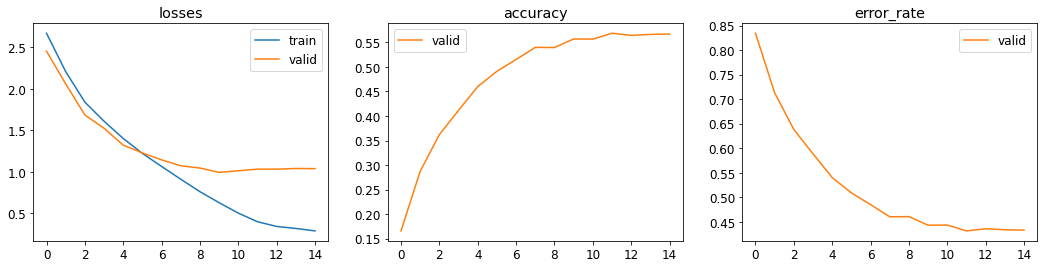

In [ ]:
print("Métricas del modelo con Dropout")
learnDropout.recorder.plot_metrics()

In [ ]:
print("Accuracy Dropout")
cm = ClassificationInterpretation.from_learner(learnDropout, 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnDropout, 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy Dropout


Accuracy Train:  91.66 %


Accuracy Valid:  56.720000000000006 %


Como vemos, aún con las capas de Dropout añadidas seguimos teniendo overfitting. Por tanto, veo necesaria la reducción de canales en las capas convolucionales. Además, aumentaré ligeramente la posibilidad de Dropout en las capas convolucionales. 

Tras realizar algunas pruebas, la modificación de estos parámetros reducía la eficacia en validación del modelo, por lo que además, he introducido una capa Linear intermedia para tratar de evitar esto (también con Dropout)

In [ ]:
class DropoutReducedNet(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),

      nn.MaxPool2d(kernel_size=2,stride=2),

      nn.Dropout(0.3),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      
      nn.MaxPool2d(kernel_size=2,stride=2),      
      Flatten(),

      nn.Linear(5*5*128, 1000),
      nn.ReLU(),

      nn.Dropout(0.5),
      nn.Linear(1000, 500),
      nn.ReLU(),

      nn.Dropout(0.5),
      nn.Linear(500, 25)
    )

In [ ]:
CIFAR100dlNormalized=DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()] # Normalize data
                  ).dataloaders(path/'train') 

# Usamos el mismo dataloader que antes (el que ya normaliza las imágnes)
learnDropoutReduced = Learner(CIFAR100dlNormalized, DropoutReducedNet(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())

0.0012022644514217973


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.876760,2.745782,0.099600,0.900400,00:16
1,2.363061,2.329901,0.198800,0.801200,00:15
2,2.009753,1.826745,0.291600,0.708400,00:15
3,1.750031,1.609886,0.358400,0.641600,00:13
4,1.578259,1.652453,0.340800,0.659200,00:13
5,1.396666,1.452061,0.406400,0.593600,00:13
6,1.290410,1.284265,0.452000,0.548000,00:13
7,1.141960,1.324406,0.442000,0.558000,00:15
8,1.022483,1.193367,0.481600,0.518400,00:13
9,0.917490,1.139241,0.499200,0.500800,00:13


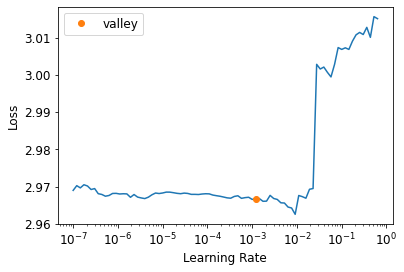

In [ ]:
lr=learnDropoutReduced.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnDropoutReduced.fit_one_cycle(n_epoch=15, lr_max=lr[0]) # running the optimizer one-cycle

Métricas del modelo con Dropout


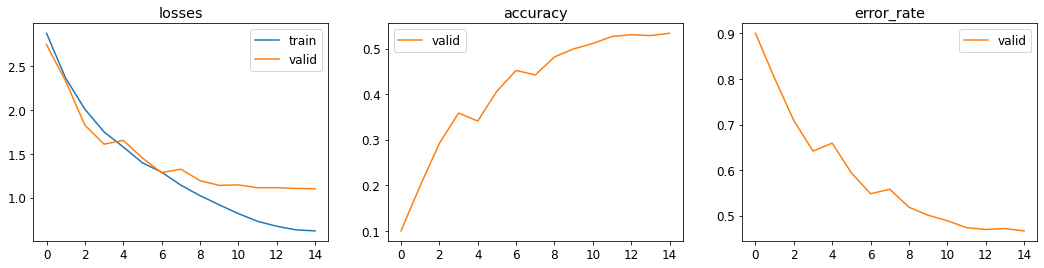

In [ ]:
print("Métricas del modelo con Dropout")
learnDropoutReduced.recorder.plot_metrics()

In [ ]:
print("Accuracy Dropout")
cm = ClassificationInterpretation.from_learner(learnDropoutReduced, 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnDropoutReduced, 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy Dropout


Accuracy Train:  70.78 %


Accuracy Valid:  53.36 %


Como podemos ver, el overfitting no está solucionado al 100% pero al menos no perdemos precisión en la validación.

La solución final al problema de overfitting vendrá más tarde con la técnica de Early Stopping

## Batch normalization
Introducimos ahora con la capa BatchNorm de fastai capas de Batch Normalization. 

Aunque hay debate en esta cuestión, y a pesar de que el paper original que propone el uso de batch normalization (https://arxiv.org/abs/1502.03167) propone utilizar estas capas antes de la capa de activación. Sin embargo, existen también los defensores de colocar las capas de BN después de la activación. Estudiaremos las dos posibilidades comparándolas.

En mi caso, colocaré una capa de Batch Normalization en cada capa convolucional así como en las capas densas..

In [ ]:
class BNNetBefore(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), padding='valid'),
      BatchNorm(16),
      nn.ReLU(),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding='valid'),
      BatchNorm(32),
      nn.ReLU(),

      nn.MaxPool2d(kernel_size=2,stride=2),

      nn.Dropout(0.3),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding='valid'),
      BatchNorm(64),
      nn.ReLU(),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding='valid'),
      BatchNorm(128),
      nn.ReLU(),
      
      nn.MaxPool2d(kernel_size=2,stride=2),      
      Flatten(),

      nn.Linear(5*5*128, 1000),
      BatchNorm(1000,1),
      nn.ReLU(),

      nn.Dropout(0.5),
      nn.Linear(1000, 500),
      BatchNorm(500,1),
      nn.ReLU(),

      nn.Dropout(0.5),
      nn.Linear(500, 25)
    )

In [ ]:
class BNNetAfter(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      BatchNorm(16),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      BatchNorm(32),

      nn.MaxPool2d(kernel_size=2,stride=2),

      nn.Dropout(0.3),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      BatchNorm(64),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding='valid'),
      nn.ReLU(),
      BatchNorm(128),
      
      nn.MaxPool2d(kernel_size=2,stride=2),      
      Flatten(),

      nn.Linear(5*5*128, 1000),
      nn.ReLU(),
      BatchNorm(1000,1),

      nn.Dropout(0.5),
      nn.Linear(1000, 500),
      nn.ReLU(),
      BatchNorm(500,1),

      nn.Dropout(0.5),
      nn.Linear(500, 25)
    )

In [ ]:
CIFAR100dlNormalized=DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()] # Normalize data
                  ).dataloaders(path/'train') 

# Usamos el mismo dataloader que antes (el que ya normaliza las imágnes)
learnBN = [None,None]
learnBN[0] = Learner(CIFAR100dlNormalized, BNNetBefore(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())
learnBN[1] = Learner(CIFAR100dlNormalized, BNNetAfter(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())

0.0005754399462603033


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.778680,3.096606,0.064000,0.936000,00:14
1,2.251286,2.750331,0.139200,0.860800,00:19
2,1.924359,2.481788,0.185600,0.814400,00:13
3,1.734739,2.094155,0.266000,0.734000,00:13
4,1.580701,1.976375,0.315600,0.684400,00:13
5,1.463796,1.617831,0.380800,0.619200,00:14
6,1.344907,1.667417,0.381600,0.618400,00:15
7,1.242463,1.630315,0.387600,0.612400,00:13
8,1.164058,1.544593,0.412800,0.587200,00:13
9,1.083393,1.436171,0.434400,0.565600,00:14


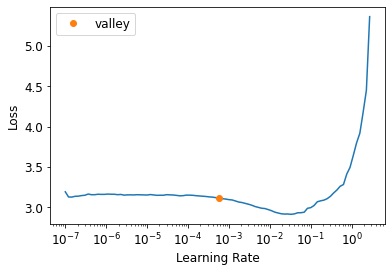

In [ ]:
lr=learnBN[0].lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnBN[0].fit_one_cycle(n_epoch=15, lr_max=lr[0]) # running the optimizer one-cycle

0.0004786300996784121


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.853481,3.718571,0.067600,0.932400,00:13
1,2.356339,7.085003,0.096800,0.903200,00:16
2,2.003944,4.689392,0.168800,0.831200,00:16
3,1.779957,3.611851,0.225200,0.774800,00:14
4,1.672996,2.860204,0.300000,0.700000,00:14
5,1.505268,2.932042,0.300000,0.700000,00:19
6,1.426415,2.412695,0.356400,0.643600,00:21
7,1.325355,2.334788,0.370800,0.629200,00:16
8,1.212069,1.970378,0.400400,0.599600,00:14
9,1.084810,2.141005,0.411600,0.588400,00:16


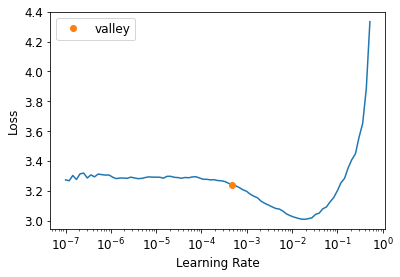

In [ ]:
lr=learnBN[1].lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnBN[1].fit_one_cycle(n_epoch=15, lr_max=lr[0]) # running the optimizer one-cycle

Métricas del modelo con BN Antes


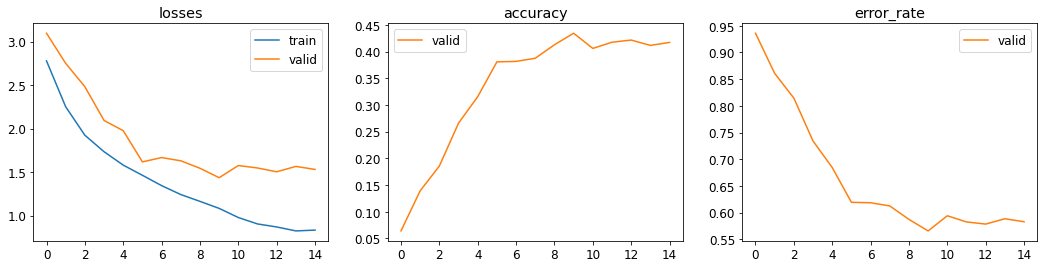

In [ ]:
print("Métricas del modelo con BN Antes")
learnBN[0].recorder.plot_metrics()

Métricas del modelo con BN Después


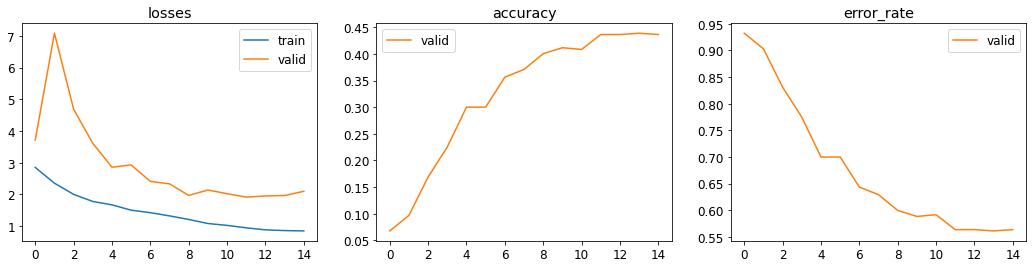

In [ ]:
print("Métricas del modelo con BN Después")
learnBN[1].recorder.plot_metrics()

In [ ]:
print("Accuracy BN Antes")
cm = ClassificationInterpretation.from_learner(learnBN[0], 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnBN[0], 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy BN Antes


Accuracy Train:  57.79 %


Accuracy Valid:  41.72 %


In [ ]:
print("Accuracy BN Después")
cm = ClassificationInterpretation.from_learner(learnBN[1], 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnBN[1], 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy BN Después


Accuracy Train:  61.309999999999995 %


Accuracy Valid:  43.64 %


A pesar de que en algunas ejecuciones el modelo con las capas de Batch Normalization después de las activaciones da mejores resultados, nos quedaremos con el que introduce las capas de Batch Normalization antes de las activaciones porque da mejores resultados generalmente y acepta mejor la introducción de Early Stopping que realizaremos ahora

## Early stopping
El early stopping es una forma de regularización para evitar overfitting. Con este método según se avanza en el número de épocas, se va revisando cómo evoluciona el error en el conjunto de validación y en el momento en el que este error no mejora se para el entrenamiento, pues si, a partir de ahí siguiéramos entrenando, la red simplemente estaría memorizando los datos de entrenamiento y no podría generalizar bien (overfitting).

En nuestro caso, aún nos queda pendiente terminar de arreglar el overfitting por lo que la introducción de Early Stopping debería mejorar ese ámbito.

In [ ]:
class DefinitiveNet(nn.Sequential):
  def __init__(self):
    super().__init__(
      nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), padding='valid'),
      BatchNorm(16),
      nn.ReLU(),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding='valid'),
      BatchNorm(32),
      nn.ReLU(),

      nn.MaxPool2d(kernel_size=2,stride=2),

      nn.Dropout(0.3),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding='valid'),
      BatchNorm(64),
      nn.ReLU(),
      
      nn.Dropout(0.3),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding='valid'),
      BatchNorm(128),
      nn.ReLU(),
      
      nn.MaxPool2d(kernel_size=2,stride=2),      
      Flatten(),

      nn.Linear(5*5*128, 1000),
      BatchNorm(1000,1),
      nn.ReLU(),

      nn.Dropout(0.5),
      nn.Linear(1000, 500),
      BatchNorm(500,1),
      nn.ReLU(),

      nn.Dropout(0.5),
      nn.Linear(500, 25)
    )

In [ ]:
CIFAR100dlNormalized=DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()] # Normalize data
                  ).dataloaders(path/'train') 

# Usamos el mismo dataloader que antes (el que ya normaliza las imágnes)
learnEarlyStopping = Learner(CIFAR100dlNormalized, DefinitiveNet(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())

Exception ignored in: <finalize object at 0x7f282b0a3500; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'models/tmpszpv8n7f'


Para añadir Early Stopping lo haremos mediante la introducción de un CallBack en el Learner que se encargará de comprobar que el valor del monitor (valid_loss por defecto) mejore en cada iteración. Cuando deje de mejorar el entrenamiento se parará.

Aumentamos el número de épocas para que se alcance el Early Stopping seguro en todos los entrenamientos y no finalice por el límite que le ponemos.

0.0005754399462603033


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.861908,3.057251,0.066400,0.933600,00:14
1,2.428476,2.827441,0.108800,0.891200,00:18
2,2.108209,2.606709,0.155600,0.844400,00:21
3,1.861228,2.512183,0.198000,0.802000,00:14
4,1.680944,2.036708,0.281200,0.718800,00:13
5,1.586773,1.817081,0.334800,0.665200,00:16
6,1.486356,1.816755,0.330400,0.669600,00:13
7,1.367360,1.659608,0.370400,0.629600,00:13
8,1.281170,1.496478,0.410000,0.590000,00:13
9,1.199757,1.537243,0.406800,0.593200,00:18


No improvement since epoch 8: early stopping


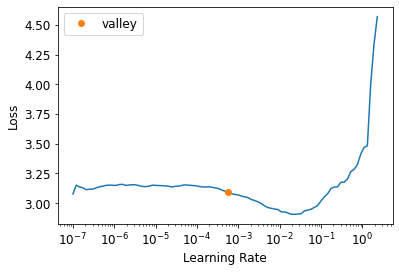

In [ ]:
learnEarlyStopping.add_cb(EarlyStoppingCallback())
lr=learnEarlyStopping.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnEarlyStopping.fit_one_cycle(n_epoch=25, lr_max=lr[0]) # running the optimizer one-cycle

Métricas del modelo con Early Stopping


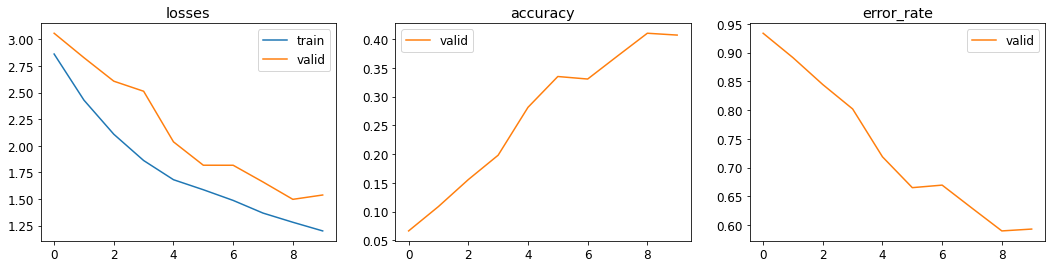

In [ ]:
print("Métricas del modelo con Early Stopping")
learnEarlyStopping.recorder.plot_metrics()

In [ ]:
print("Accuracy Early Stopping")
cm = ClassificationInterpretation.from_learner(learnEarlyStopping, 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnEarlyStopping, 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy Early Stopping


Accuracy Train:  51.300000000000004 %


Accuracy Valid:  40.68 %


Como podemos observar, a pesar de que el modelo pierde algo de rendimiento en validación, el problema del overfitting queda solucionado y el modelo generaliza mucho mejor.

## Data augmentation
Por data augmentation se entiende la introducción de algunas transformaciones a las imágenes de entrenamiento con el objetivo de generar nuevas entradas a partir de las ya existentes.

En este caso, consultando el apartado Vision augmentation (https://docs.fast.ai/vision.augment.html) de la documentación de fastai, vemos que podemos incluir, en el parámetro item_tfms del datablock, una función RandTransform, que nos incluirá una transformación aleatoria con la probabilidad que le indiquemos, lo cual aplicará data augmentation.

In [ ]:
CIFAR100dlTransformations=DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()], # Normalize data
                  item_tfms = [RandTransform(0.5)]
                  ).dataloaders(path/'train') 

# Usamos el mismo dataloader que antes (el que ya normaliza las imágnes)
learnTransforms = Learner(CIFAR100dlTransformations, DefinitiveNet(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f859e4517a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f859e4517a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

0.0006918309954926372


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.664961,2.987210,0.072400,0.927600,00:15
1,2.129244,2.888000,0.132000,0.868000,00:17
2,1.790985,2.575295,0.179200,0.820800,00:15
3,1.599466,1.845401,0.310400,0.689600,00:14
4,1.437870,1.850167,0.321200,0.678800,00:14


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f859e4517a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f859e4517a0>if w.is_alive():
Traceback (most recent call last):

  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    assert self._parent_pid == os.getpid(), 'can only test a child process'    self._shutdown_workers()

  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():AssertionError
:   File "/usr/lib/python3.7/multiprocessing/process.p

No improvement since epoch 3: early stopping


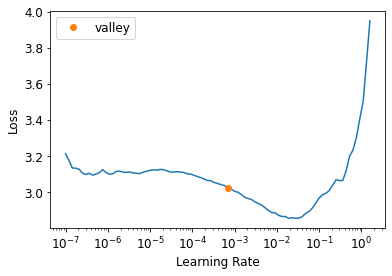

In [ ]:
learnTransforms.add_cb(EarlyStoppingCallback())
lr=learnTransforms.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnTransforms.fit_one_cycle(n_epoch=20, lr_max=lr[0]) # running the optimizer one-cycle

Métricas del modelo con Data Augmentation


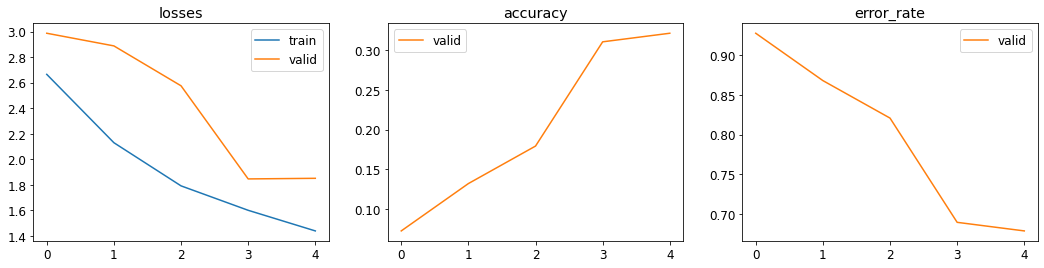

In [ ]:
print("Métricas del modelo con Data Augmentation")
learnTransforms.recorder.plot_metrics()

In [ ]:
print("Accuracy Data Augmentation")
cm = ClassificationInterpretation.from_learner(learnTransforms, 1, CIFAR100dlTransformations.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnTransforms, 1, CIFAR100dlTransformations.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy Data Augmentation


Accuracy Train:  35.449999999999996 %


Accuracy Valid:  32.12 %


Como podemos ver, la clasificación empeora notablemente cuando introducimos transformaciones aleatorias a las imágenes. Bien es cierto que encontramos errores en algunas ejecuciones relacionados con la utilización de esta función RandTransform por lo que finalmente optaré por no introducirlas en el modelo final.

## Modelo final
Una vez analizadas las diferentes posibles mejoras, procederemos a realizar una selección de las mismas para conseguir un modelo final y estudiar los resultados obtenidos con el mismo.

Finalmente, he optado por escoger el modelo que ampliaba el número de capas y de filtros, sustituía las máscaras 5x5 por máscaras 3x3, aplicaba Batch Normalization y Dropout y Early Stopping para controlar el overfitting. Además, aplicaremos data normalization a las imágenes, pero no aplicaremos data augmentation

| Layer No. | Layer Type | Kernel size    | Input \| Output dimension | Input \| Output channels | Dropout Probability |
|-----------|------------|----------------|---------------------------|--------------------------|---------------------|
| 1         | Conv2D     | 3x3            | 32 \| 30                  | 3 \| 16                  |                     |
| 2         | BatchNorm  |                |                           |                          |                     |
| 3         | ReLU       |                |                           |                          |                     |
| 4         | Dropout    |                |                           |                          | 0.3                 |
| 5         | Conv2D     | 3x3            | 30 \| 28                  | 16 \| 32                 |                     |
| 6         | BatchNorm  |                |                           |                          |                     |
| 7         | ReLU       |                |                           |                          |                     |
| 8         | MaxPool2D  | 2x2 (stride 2) | 28 \| 14                  |                          |                     |
| 9         | Dropout    |                |                           |                          | 0.3                 |
| 10        | Conv2D     | 3x3            | 14 \| 12                  | 32 \| 64                 |                     |
| 11        | BatchNorm  |                |                           |                          |                     |
| 12        | ReLU       |                |                           |                          |                     |
| 13        | Dropout    |                |                           |                          | 0.3                 |
| 14        | Conv2D     | 3x3            | 12 \| 10                  | 64 \| 128                |                     |
| 15        | BatchNorm  |                |                           |                          |                     |
| 16        | ReLU       |                |                           |                          |                     |
| 17        | MaxPool2D  | 2x2 (stride 2) | 10 \| 5                   |                          |                     |
| 18        | Flatten    |                |                           |                          |                     |
| 19        | Linear     |                | 3200 \| 1000              |                          |                     |
| 20        | BatchNorm  |                |                           |                          |                     |
| 21        | ReLu       |                |                           |                          |                     |
| 22        | Dropout    |                |                           |                          | 0.5                 |
| 23        | Linear     |                | 1000 \| 500               |                          |                     |
| 24        | BatchNorm  |                |                           |                          |                     |
| 25        | ReLU       |                |                           |                          |                     |
| 26        | Dropout    |                |                           |                          | 0.5                 |
| 27        | Linear     |                | 500 \| 25                 |                          |                     |

In [ ]:
CIFAR100dlNormalized=DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(seed=0), 
                  batch_tfms = [Normalize()] # Normalize data
                  ).dataloaders(path/'train') 

# Usamos el mismo dataloader que antes (el que ya normaliza las imágnes)
learnFinal = Learner(CIFAR100dlNormalized, DefinitiveNet(), metrics=[accuracy, error_rate], loss_func=FocalLossFlat())

0.0005754399462603033


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.839830,3.057232,0.054400,0.945600,00:15
1,2.361385,2.817553,0.106400,0.893600,00:15
2,2.033546,2.532327,0.169600,0.830400,00:14
3,1.794937,2.487321,0.200800,0.799200,00:16
4,1.686110,1.965587,0.288800,0.711200,00:14
5,1.554571,1.810129,0.329600,0.670400,00:13
6,1.401601,1.769084,0.337600,0.662400,00:14
7,1.329438,1.523556,0.399600,0.600400,00:16
8,1.208321,1.528914,0.404000,0.596000,00:14


No improvement since epoch 7: early stopping


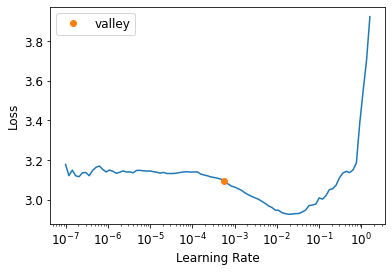

In [ ]:
learnFinal.add_cb(EarlyStoppingCallback())
lr=learnFinal.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])

learnFinal.fit_one_cycle(n_epoch=20, lr_max=lr[0]) # running the optimizer one-cycle

Métricas del modelo Final


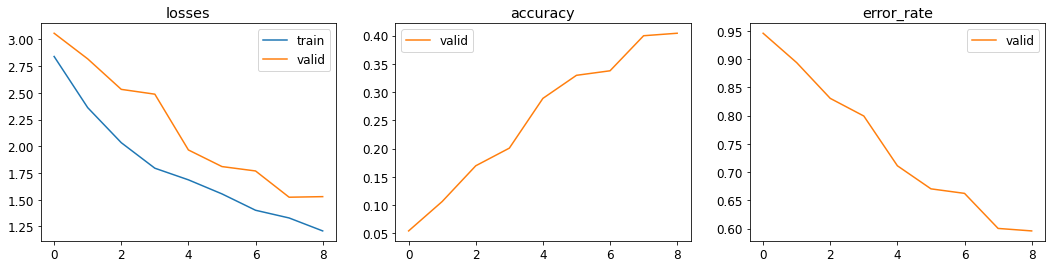

In [ ]:
print("Métricas del modelo Final")
learnFinal.recorder.plot_metrics()

In [ ]:
print("Accuracy Modelo final")
cm = ClassificationInterpretation.from_learner(learnFinal, 1, CIFAR100dlNormalized.train).confusion_matrix()
print("Accuracy Train: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

cm = ClassificationInterpretation.from_learner(learnFinal, 1, CIFAR100dlNormalized.valid).confusion_matrix()
print("Accuracy Valid: ", np.sum(np.diagonal(cm))/np.sum(cm)*100,"%")

Accuracy Modelo final


Accuracy Train:  49.4 %


Accuracy Valid:  40.400000000000006 %


Como vemos finalmente hemos conseguido un modelo capaz de conseguir casi un 50% de accuracy sin realizar sobreajuste. 

Ahora vamos a evaluar el modelo en el conjunto de test para obtener una cota de error definitiva

Number of test examples: 2500


Test Accuracy
41.4


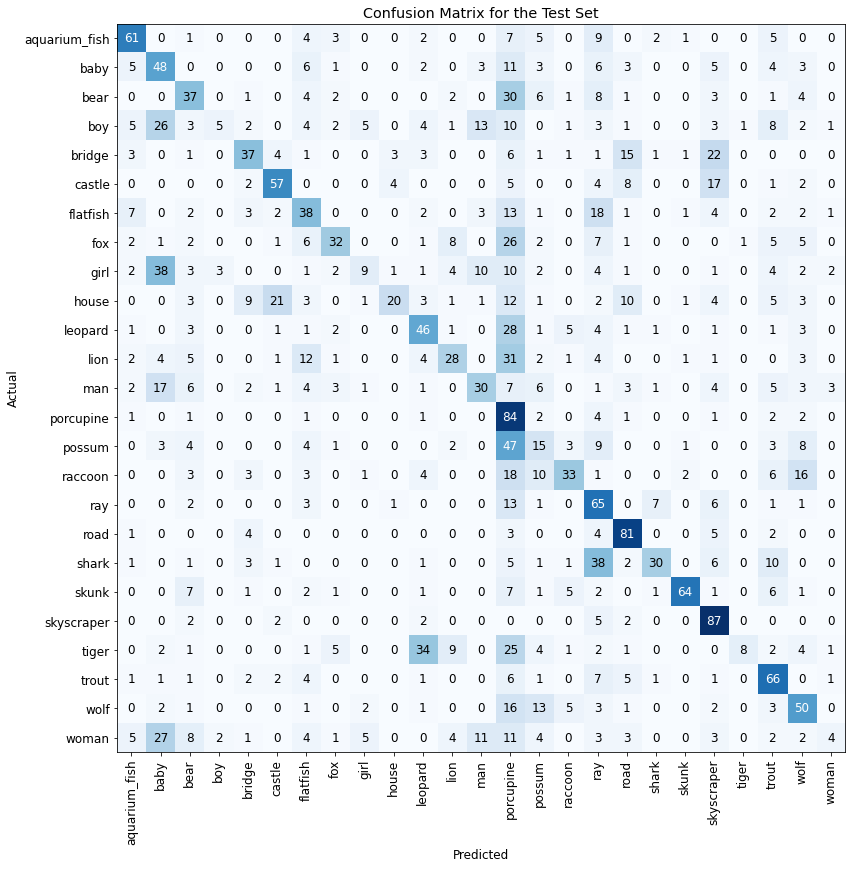

In [ ]:
test_dl = learnFinal.dls.test_dl(files_test,with_labels=True)

interp = ClassificationInterpretation.from_learner(learnFinal, 1, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
interp.plot_confusion_matrix(figsize=(12, 12),title='Confusion Matrix for the Test Set')
print('Test Accuracy') 
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Realizando un análisis rápido a la matriz de confusión en el conjunto de test vemos que, aunque aún el modelo falla en muchas predicciones y confunde muchas clases, no es un mal modelo teniendo en cuenta la información que aportan las imágenes (solo 32 por 32 píxeles en color), con respecto a la cantidad de clases que hay que clasificar.

# **Exercise  3: Model transfer and fine-tuning with ResNet18 for the Caltech-UCSD Birds-200-2011 database (3 points)**
In this exercise we will work with the Caltech-UCSD Birds-200-2011 dataset (https://www.vision.caltech.edu/datasets/cub_200_2011/). This dataset consists of 11,788 images of 200 bird species. It has 200 classes, with 5,994 for training and 5,794 for testing. Again, 10% of the training set will be left for validation. Read the dataset using the provided functions.

We will use the ResNet18 network model already pre-trained with ImageNet, it can be downloaded from the Fastai Model repository. You have to:
1. **Use ResNet18 as a feature extractor** for the Caltech-UCSD Birds-200-2011 dataset. To do this we will remove at least the head of the downloaded model, we will add some additional convolutional blocks and a new head. Specifically, students have to perform the following experiments:
    
    **1.1.** Download and adapt the ResNet18 model trained with ImageNet to the Caltech-UCSD dataset, retrain this new fully connected layer, and estimate the network performance. 
    
    **1.2.** Remove the head of the model and add new convolutional blocks and a new head designed by you. Retrain your model with Caltech-UCSD. 
    
    **1.3.** Compare the results obtained in 1.2 and 1.1.

  Remember that, during training, you have to freeze the weights in the feature extraction blocks.

2. **Make a fine-tuning of the entire ResNet18 network** for  Caltech-UCSD. Remember that the number of epochs for fine-tuning must be small.





In [5]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [6]:
# We explore a little bit the folders and number of examples.
# train_test_split.txt contains the information about which images are for training and which ones are for testing
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)

/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [7]:
# images.txt contains the numbered list of all images. Combining the information in images.txt and train_test_split.txt we can 
# get the actual images for training and test. First, we read the images.txt file. 
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [8]:
# We check if all classes are more or less equally well represented. 
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")

Number of examples per class
60 60 59 60 60 60 44 59 59 60 60 60 60 60 60 60 60 56 56 60 60 60 60 60 60 59 60 59 60 60 60 59 60 60 59 60 60 49 60 59 60 53 59 59 60 60 60 58 60 60 60 59 59 60 60 60 60 60 60 58 60 60 60 60 58 60 57 60 60 60 60 59 50 60 59 60 60 60 60 60 60 60 60 60 60 60 60 60 59 59 60 60 60 60 60 56 60 53 60 60 60 59 60 60 60 50 60 60 60 60 58 60 60 60 60 51 60 60 59 60 59 59 60 60 60 60 60 60 50 60 60 60 60 60 59 50 60 60 60 60 59 60 60 60 60 60 52 60 60 48 59 60 60 60 60 60 59 59 60 60 60 60 53 60 60 58 45 60 41 60 60 60 57 59 60 60 60 60 60 60 58 59 60 59 59 60 60 60 60 60 60 59 60 60 60 60 60 59 60 60 

In [9]:
print(path)
import shutil, os
# If we already have these folders, we remove them because we want to create them from scratch
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

# We copy all images in two folders (train and test). Initially, both folders contain the same information.
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')

/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [10]:
# Now we remove from training those images belonging to test, and we remove
# from test those images belonging to train. 
import os 
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [11]:
# We list the number of images in the folders to check if we actually have 5,994 images for training and 5,794 for testing
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  5994
Total test images:  5794


## 3.1 Training

### 3.1.1 Adapted model

El primer paso es probar a utilizar el modelo de resnet18 ya entrenado con una cabeza que nos permita utilizarlo para este problema de clasificación.

En cuanto al DataBlock, reescalaremos todas las imágenes (que tienen tamaños diferentes a 224x224 ya que este es el tamaño con el que está entrenado resnet)

Para crear este modelo adaptado vamos simplemente a utilizar la función vision_learner, al que, pasandole el dataloader y el modelo que queremos utilizar (pretrained a True para que sea preentrenado) nos adapta el modelo con una cabeza por defecto para utilizarlo en ese problema.

Una vez creado el modelo adaptado, crearemos el objeto learner con la función vision_learner y añadiremos un callback de early stopping para evitar overfitting.

In [16]:
#Code to be done by the students.
BirdsDB = DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(), # Mantener división
                  batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], # Normalize data with ImageNet stats
                  item_tfms = Resize(224)
                  )             # define the labels
                   # generate training and validatiion sets (No existe el test)
# BirdsDB.summary(path/'train')
BirdsDL=BirdsDB.dataloaders(path/'train') 

adaptedHead = nn.Sequential(
    Flatten(),
    nn.Linear(25088,200)
)

learnerAdapted = vision_learner(BirdsDL, fastai.vision.models.resnet18, train_bn=False,pretrained=True,
                                loss_func=CrossEntropyLossFlat(),metrics=[accuracy,error_rate])

print(learnerAdapted.summary())

learnerAdapted.add_cb(EarlyStoppingCallback(min_delta=0.1, patience=2))

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                      

Vemos con summary que todos los parámetros del modelo en sí están congelados y solo vamos a poder entrenar los de la cabeza.

Procedemos ahora a entrenar con la función fit_one_cycle, con 20 épocas (que pararán con el Early Stopping) y el learning rate máximo que nos da la función lr_find

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,6.776662,5.174586,0.031720,0.968280,00:48
1,5.465812,3.592890,0.198664,0.801336,00:42
2,3.852459,2.483767,0.404841,0.595159,00:41
3,2.683505,2.065048,0.481636,0.518364,00:40
4,1.965513,1.905083,0.496661,0.503339,00:43
5,1.546254,1.862078,0.530050,0.469950,00:40
6,1.295748,1.843869,0.515860,0.484140,00:40


No improvement since epoch 4: early stopping
Curvas del modelo adaptado


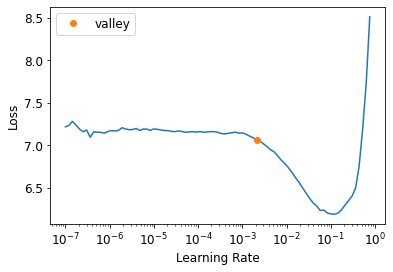

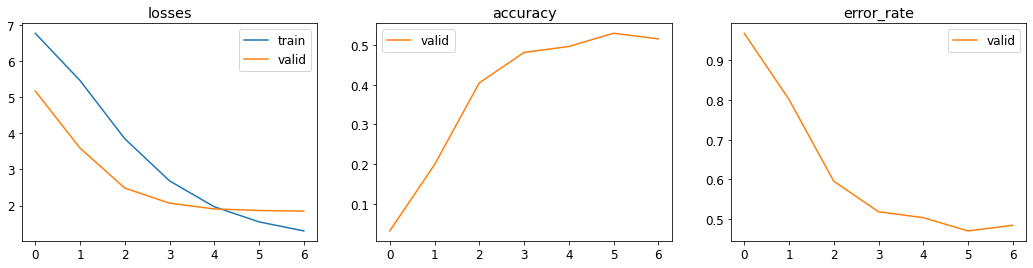

In [17]:
lr = learnerAdapted.lr_find()
learnerAdapted.fit_one_cycle(n_epoch=20, lr_max=lr[0])
print("Curvas del modelo adaptado")
learnerAdapted.recorder.plot_metrics() # shows accuracy curve along epochs

In [18]:
interp = ClassificationInterpretation.from_learner(learnerAdapted, 1, BirdsDL.valid)
cm = interp.confusion_matrix()
print('Number of valid examples:', np.sum(cm))
print('Valid Accuracy') 
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of valid examples: 1198
Valid Accuracy
51.58597662771286


In [20]:
interp = ClassificationInterpretation.from_learner(learnerAdapted, 1, BirdsDL.train)
cm = interp.confusion_matrix()
print('Number of train examples:', np.sum(cm))
print('Train Accuracy') 
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of train examples: 4796
Train Accuracy
92.6814011676397


Como vemos, la red no consigue resultados excepcionales en validación ya que la cabecera está muy limitada. Vemos también que se produce overfitting a pesar del Early Stopping.

En el siguiente apartado trataremos de introducir algunas capas más de convolución y una cabecera un poco más compleja con capas de Dropout para tratar de evitar también el overfitting

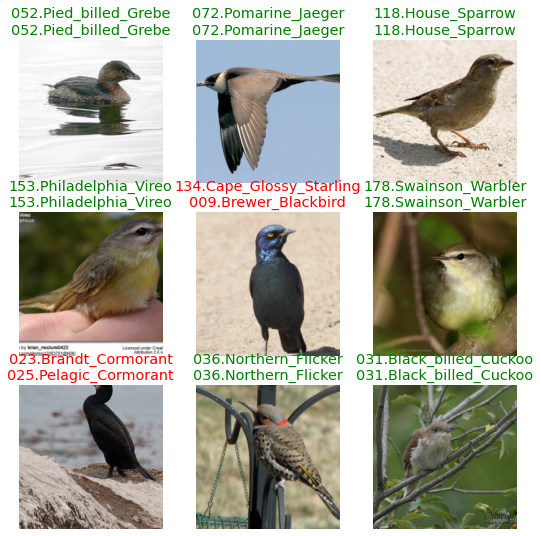

In [21]:
learnerAdapted.show_results()

### 3.1.2 New Head

Ahora, tal y como se sugiere, introduciremos nuevas modificaciones al modelo.

En mi caso, he optado por la introducción de otras 2 capas convolucionales (cada una con su respectiva capa de BatchNormalization y activación), para ampliar también el número de canales de salida del bloque extractor de características.

Además, también he incluido una capa de Adaptive Avg Pool que nos reduce la salida de 7x7 con 1024 canales que nos quedaban de la capa anterior, a 3x3 manteniendo los 1024 canales.

Como cabeza de la función (después de realizar el Flatten()) introduciré 3 capas densas:
* De 9216 a 5000 características
* De 5000 a 1000. Esta capa incluirá Dropout a una alta probabilidad (0.6) para controlar un poco el overfitting.
* De 1000 a 200

In [55]:
newHead = nn.Sequential(
    nn.Conv2d(512,256,(3,3),padding=(1,1)),
    BatchNorm(256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Conv2d(256,128,(3,3),padding=(1,1)),
    BatchNorm(128),
    nn.ReLU(),

    Flatten(),
    
    nn.Linear(2048, 1000),
    BatchNorm(1000,1),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1000,500),
    BatchNorm(500,1), 
    nn.ReLU(),
    nn.Linear(500,200)
)

In [56]:
#Code to be done by the students.
BirdsDB = DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(), # Mantener división
                  batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], # Normalize data with ImageNet stats
                  item_tfms = Resize(112)
                  )             # define the labels
                   # generate training and validatiion sets (No existe el test)
# BirdsDB.summary(path/'train')
BirdsDL=BirdsDB.dataloaders(path/'train') 

Utilizamos ahora el parámetro custom_head para introducir la cabeza que hemos decidido.

Como vemos, de nuevo las capas preentrenadas están congeladas y solo son entrenables los pesos de las últimas capas

In [57]:
learnerNewHead = vision_learner(BirdsDL, fastai.vision.models.resnet18, train_bn=False,pretrained=True,
                                loss_func=CrossEntropyLossFlat(),metrics=[accuracy,error_rate],custom_head=newHead)

learnerNewHead.add_cb(EarlyStoppingCallback(min_delta=0.2, patience=2))

print(learnerNewHead.summary())

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 64 x 3 x 112 x 112)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 56 x 56   
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 28 x 28   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                      

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,5.754542,5.312153,0.012521,0.987479,00:41
1,5.432000,4.924235,0.070952,0.929048,00:35
2,4.850739,4.260582,0.120200,0.879800,00:36
3,4.154940,3.673617,0.183639,0.816361,00:38
4,3.567663,3.319990,0.219533,0.780467,00:35
5,3.152869,3.183082,0.244574,0.755426,00:37
6,2.805212,3.029323,0.282137,0.717863,00:37
7,2.518490,3.019670,0.283806,0.716194,00:35
8,2.285063,2.998762,0.297162,0.702838,00:34


No improvement since epoch 6: early stopping
Curvas del modelo con modificaciones


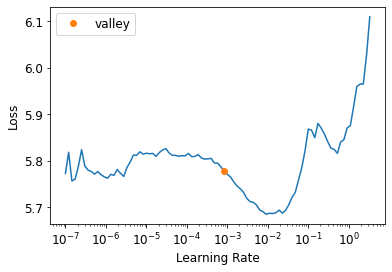

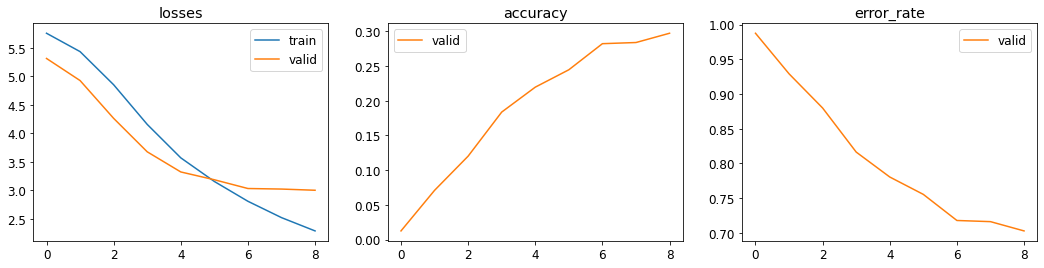

In [58]:
lr = learnerNewHead.lr_find()
learnerNewHead.fit_one_cycle(n_epoch=20, lr_max=lr[0])

print("Curvas del modelo con modificaciones")
learnerNewHead.recorder.plot_metrics() # shows accuracy curve along epochs

In [59]:
interp = ClassificationInterpretation.from_learner(learnerNewHead, 1, BirdsDL.valid)
cm = interp.confusion_matrix()
print('Number of valid examples:', np.sum(cm))
print('Valid Accuracy') 
print(np.sum(np.diagonal(cm))/np.sum(cm)*100, "%")

Number of valid examples: 1198
Valid Accuracy
29.716193656093488 %


In [60]:
interp = ClassificationInterpretation.from_learner(learnerNewHead, 1, BirdsDL.train)
cm = interp.confusion_matrix()
print('Number of training examples:', np.sum(cm))
print('Training Accuracy') 
print(np.sum(np.diagonal(cm))/np.sum(cm)*100, "%")

Number of training examples: 4796
Training Accuracy
64.72060050041702 %


Como podemos ver, el resultado no es muy esperanzador. La precisión en el conjunto de validación no arroja un buen resultado. Eso, junto el relativamente bajo accuracy en entrenamiento, nos hace concluir que el modelo, con los pesos congelados, no permite ajustarse a estas imágenes ya que las características extraídas entre uno y otro datasets son diferentes.

## 3.2 Fine tuning

Una vez observados los resultados obtenidos con la introducción de nuevas cabeceras al modelo de resnet18 y un entrenamiento con los pesos del modelo congelados (y entrenando únicamente los pesos introducidos), vamos a realizar ahora la técnica del fine tuning.

En deep learning se entiende por fine tuning a la técnica que utiliza los pesos de un modelo preentrenado como inicialización para un nuevo entrenamiento.

Para ello, la forma de proceder es realizar una serie de épocas de entrenamiento con los pesos del modelo principal (no los de la cabeza) congelados y posteriormente, descongelar todos los pesos y realizar el último ajuste.

Para ello vamos utilizar la función fine_tune a la que indicaremos el número de épocas que queremos entrenar con los pesos del cuerpo congelados y el número de épocas que queremos entrenar todo el modelo.

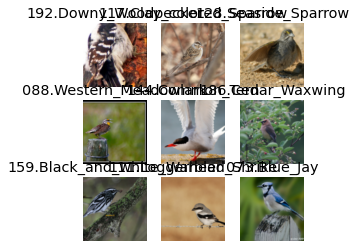

In [73]:
#Code to be done by the students.
BirdsDB = DataBlock(blocks = (ImageBlock,CategoryBlock), # define the input to the learner
                  get_items = get_image_files,      # read all images in subfolders
                  get_y =parent_label,
                  splitter=RandomSplitter(), # Mantener división
                  batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], # Normalize data with ImageNet stats
                  item_tfms = Resize(112)
                  )             # define the labels
                   # generate training and validatiion sets (No existe el test)
# BirdsDB.summary(path/'train')
BirdsDL=BirdsDB.dataloaders(path/'train') 
BirdsDL.show_batch(max_n=9, figsize=(4,4)) # shows a batch of images

In [74]:
learnerFineTune = vision_learner(BirdsDL, fastai.vision.models.resnet18, train_bn=False,pretrained=True,
                                loss_func=CrossEntropyLossFlat(),metrics=[accuracy,error_rate])

print(learnerFineTune.summary())

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 64 x 3 x 112 x 112)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 56 x 56   
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 28 x 28   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                      

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,6.808767,5.245261,0.028381,0.971619,00:37
1,5.473819,3.897714,0.174457,0.825543,00:35
2,4.249785,3.395036,0.234558,0.765442,00:37


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.927062,2.797124,0.331386,0.668614,00:36
1,2.400743,2.570083,0.371452,0.628548,00:38
2,1.819551,2.534295,0.383973,0.616027,00:37


Curvas del modelo con modificaciones


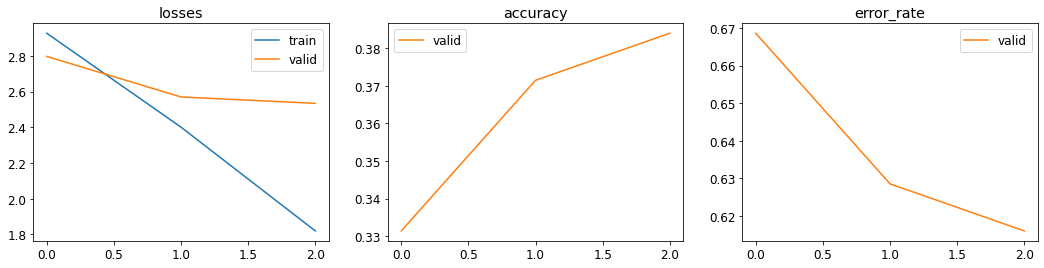

In [75]:
learnerFineTune.fine_tune(3,freeze_epochs=3)

print("Curvas del modelo con modificaciones")
learnerFineTune.recorder.plot_metrics() # shows accuracy curve along epochs

In [76]:
interp = ClassificationInterpretation.from_learner(learnerFineTune, 1, BirdsDL.valid)
cm = interp.confusion_matrix()
print('Number of valid examples:', np.sum(cm))
print('Valid Accuracy') 
print(np.sum(np.diagonal(cm))/np.sum(cm)*100, "%")

Number of valid examples: 1198
Valid Accuracy
38.397328881469114 %


In [77]:
interp = ClassificationInterpretation.from_learner(learnerFineTune, 1, BirdsDL.train)
cm = interp.confusion_matrix()
print('Number of training examples:', np.sum(cm))
print('Training Accuracy') 
print(np.sum(np.diagonal(cm))/np.sum(cm)*100, "%")

Number of training examples: 4796
Training Accuracy
82.54795663052545 %


Como podemos observar, el resultado, aunque mejor que en los experimentos previos, tampoco es nada esperanzador.

Podemos observar que el accuracy en validación se mantiene por debajo de un 40% y en training asciende hasta un 80%. Esto nos demuestra que estamos realizando overfitting, lo que quizás se podría solucionar introduciendo al modelo resnet18, capas de Dropout que controlara este overfitting.

---



---



---

# **Bonus. (3 points)**  

There are many other possibilities to improve the *BaseNet* model over CIFAR100 using suitable combinations of layers. Feel free to try your own ideas, or those interesting machine learning and computer vision approaches you've read about. Student proposals are expected for discussion and clear definition. Each proposal will be evaluated based on its innovation, complexity, and good use of PyTorch+Fastai. We will also take the mastering of the libraries used in the experiment into consideration.

**Note 1**: The Bonus will only be taken into account if, at least, 75% of the compulsory part is correct. 

**Note 2**: Since Colab only offers limited computational resources, students must try to rationally limit training time, memory consumption and size of the models used. The use of good coding practices is highly advised.